In [304]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [305]:
wq=pd.read_csv("C:/Users/HP/Downloads/winequality-red.csv")

In [306]:
wq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5
1595,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.760,11.200,6
1596,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6
1597,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5


# EDA

In [307]:
wq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [308]:
wq.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [309]:
wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [310]:
wq.shape

(1599, 12)

In [311]:
wq.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

## duplicate

In [312]:
wq.duplicated().sum()

240

In [313]:
wq.drop_duplicates(inplace=True)

In [314]:
wq.shape

(1359, 12)

## converting target value into 0 and 1

In [315]:
wq['quality'][wq['quality'] <= 6.5]= 0 
# 0=bad quality

<ipython-input-315-fd72e2e66085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wq['quality'][wq['quality'] <= 6.5]= 0


In [316]:
wq['quality'][wq['quality'] > 6.5]= 1
# 1=good quality

<ipython-input-316-3aabb161e608>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wq['quality'][wq['quality'] > 6.5]= 1


In [317]:
wq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,0
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,0
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,0
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,0
5,7.400,0.660,0.000,1.800,0.075,13.000,40.000,0.998,3.510,0.560,9.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.800,0.620,0.080,1.900,0.068,28.000,38.000,0.997,3.420,0.820,9.500,0
1594,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,0
1595,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.760,11.200,0
1597,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,0


In [318]:
wq["quality"].value_counts()

0    1175
1     184
Name: quality, dtype: int64

## outlier capping

In [319]:
wq.describe(percentiles=[0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 0.75,0.85, 0.90,0.92, 0.95, 0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,5%,10%,25%,50%,75%,85%,90%,92%,95%,97%,98%,99%,max
fixed acidity,1359.000,8.311,1.737,4.600,5.200,5.516,6.100,6.500,7.100,7.900,9.200,10.130,10.700,11.100,11.710,12.326,12.600,13.242,15.900
volatile acidity,1359.000,0.529,0.183,0.120,0.200,0.230,0.270,0.310,0.390,0.520,0.640,0.700,0.760,0.785,0.850,0.910,0.965,1.029,1.580
citric acid,1359.000,0.272,0.196,0.000,0.000,0.000,0.000,0.010,0.090,0.260,0.430,0.490,0.530,0.550,0.600,0.660,0.680,0.704,1.000
residual sugar,1359.000,2.523,1.352,0.900,1.400,1.400,1.600,1.700,1.900,2.200,2.600,2.965,3.460,3.900,4.800,6.000,6.592,8.300,15.500
chlorides,1359.000,0.088,0.049,0.012,0.042,0.046,0.053,0.060,0.070,0.079,0.091,0.100,0.110,0.115,0.138,0.180,0.236,0.368,0.611
free sulfur dioxide,1359.000,15.893,10.447,1.000,3.000,3.000,4.000,5.000,7.000,14.000,21.000,27.000,31.000,32.000,35.000,39.000,42.000,50.000,72.000
total sulfur dioxide,1359.000,46.826,33.409,6.000,8.000,9.000,11.000,14.000,22.000,38.000,63.000,84.000,94.000,101.360,113.000,127.000,135.840,145.840,289.000
density,1359.000,0.997,0.002,0.990,0.992,0.993,0.994,0.994,0.996,0.997,0.998,0.998,0.999,0.999,1.000,1.000,1.001,1.001,1.004
pH,1359.000,3.310,0.155,2.740,2.940,3.000,3.060,3.120,3.210,3.310,3.400,3.460,3.510,3.530,3.570,3.600,3.630,3.704,4.010
sulphates,1359.000,0.659,0.171,0.330,0.430,0.440,0.470,0.500,0.550,0.620,0.730,0.800,0.850,0.870,0.940,1.060,1.138,1.280,2.000


In [320]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [321]:
data_main=wq.drop(columns=["quality"])

In [322]:
data_target=wq[["quality"]]

In [323]:
data_main=data_main.apply(outlier_capping)

In [324]:
wq=pd.concat([data_main,data_target],axis=1)

In [325]:
wq

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,0
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,0
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,0
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,0
5,7.400,0.660,0.000,1.800,0.075,13.000,40.000,0.998,3.510,0.560,9.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.800,0.620,0.080,1.900,0.068,28.000,38.000,0.997,3.420,0.820,9.500,0
1594,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,0
1595,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.760,11.200,0
1597,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,0


In [326]:
wq.describe(percentiles=[0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 0.75,0.85, 0.90,0.92, 0.95, 0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,5%,10%,25%,50%,75%,85%,90%,92%,95%,97%,98%,99%,max
fixed acidity,1359.000,8.302,1.695,5.200,5.200,5.516,6.100,6.500,7.100,7.900,9.200,10.130,10.700,11.100,11.710,12.326,12.600,13.218,13.242
volatile acidity,1359.000,0.528,0.177,0.200,0.200,0.230,0.270,0.310,0.390,0.520,0.640,0.700,0.760,0.785,0.850,0.910,0.965,1.027,1.029
citric acid,1359.000,0.272,0.194,0.000,0.000,0.000,0.000,0.010,0.090,0.260,0.430,0.490,0.530,0.550,0.600,0.660,0.680,0.702,0.704
residual sugar,1359.000,2.494,1.139,1.400,1.400,1.400,1.600,1.700,1.900,2.200,2.600,2.965,3.460,3.900,4.800,6.000,6.592,8.300,8.300
chlorides,1359.000,0.087,0.043,0.042,0.042,0.046,0.053,0.060,0.070,0.079,0.091,0.100,0.110,0.115,0.138,0.180,0.236,0.368,0.368
free sulfur dioxide,1359.000,15.835,10.196,3.000,3.000,3.000,4.000,5.000,7.000,14.000,21.000,27.000,31.000,32.000,35.000,39.000,42.000,50.000,50.000
total sulfur dioxide,1359.000,46.573,32.185,8.000,8.000,9.000,11.000,14.000,22.000,38.000,63.000,84.000,94.000,101.360,113.000,127.000,135.840,145.353,145.840
density,1359.000,0.997,0.002,0.992,0.992,0.993,0.994,0.994,0.996,0.997,0.998,0.998,0.999,0.999,1.000,1.000,1.001,1.001,1.001
pH,1359.000,3.309,0.150,2.940,2.940,3.000,3.060,3.120,3.210,3.310,3.400,3.460,3.510,3.530,3.570,3.600,3.630,3.702,3.704
sulphates,1359.000,0.656,0.155,0.430,0.430,0.440,0.470,0.500,0.550,0.620,0.730,0.800,0.850,0.870,0.940,1.060,1.138,1.280,1.280


## ploting the variable

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


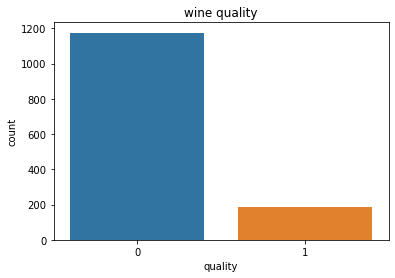

In [327]:
sns.countplot(wq["quality"])
plt.title("wine quality")
plt.show()


In [328]:
wq.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.266,0.674,0.123,0.097,-0.140,-0.105,0.670,-0.691,0.206,-0.063,0.117
volatile acidity,-0.266,1.000,-0.563,0.019,0.064,-0.015,0.089,0.022,0.250,-0.278,-0.206,-0.272
citric acid,0.674,-0.563,1.000,0.149,0.190,-0.050,0.035,0.359,-0.554,0.336,0.109,0.204
residual sugar,0.123,0.019,0.149,1.000,0.026,0.130,0.182,0.324,-0.085,-0.008,0.092,0.073
chlorides,0.097,0.064,0.190,0.026,1.000,-0.007,0.055,0.207,-0.265,0.358,-0.234,-0.102
free sulfur dioxide,-0.140,-0.015,-0.050,0.130,-0.007,1.000,0.677,-0.020,0.059,0.051,-0.082,-0.074
total sulfur dioxide,-0.105,0.089,0.035,0.182,0.055,0.677,1.000,0.099,-0.073,0.018,-0.243,-0.156
density,0.670,0.022,0.359,0.324,0.207,-0.020,0.099,1.000,-0.350,0.152,-0.507,-0.161
pH,-0.691,0.250,-0.554,-0.085,-0.265,0.059,-0.073,-0.350,1.000,-0.191,0.202,-0.055
sulphates,0.206,-0.278,0.336,-0.008,0.358,0.051,0.018,0.152,-0.191,1.000,0.113,0.227


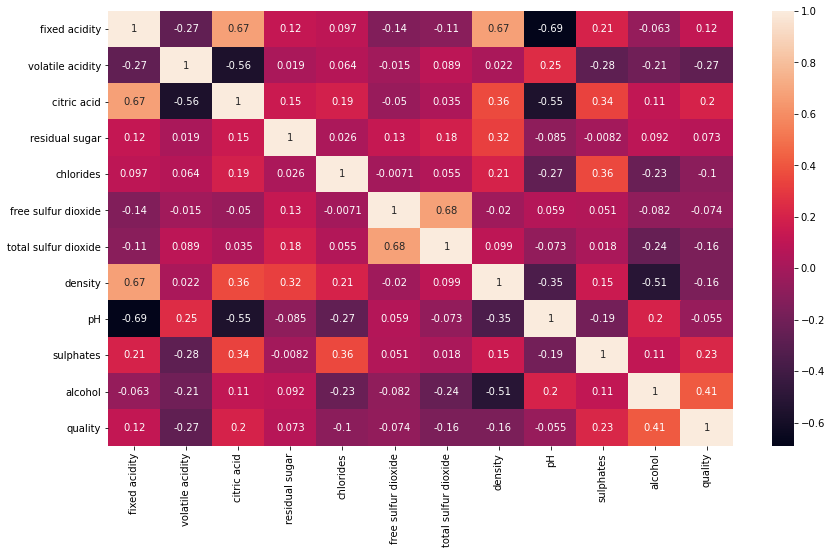

In [329]:
plt.figure(figsize=(14,8))
sns.heatmap(wq.corr(),annot=True)
plt.show()

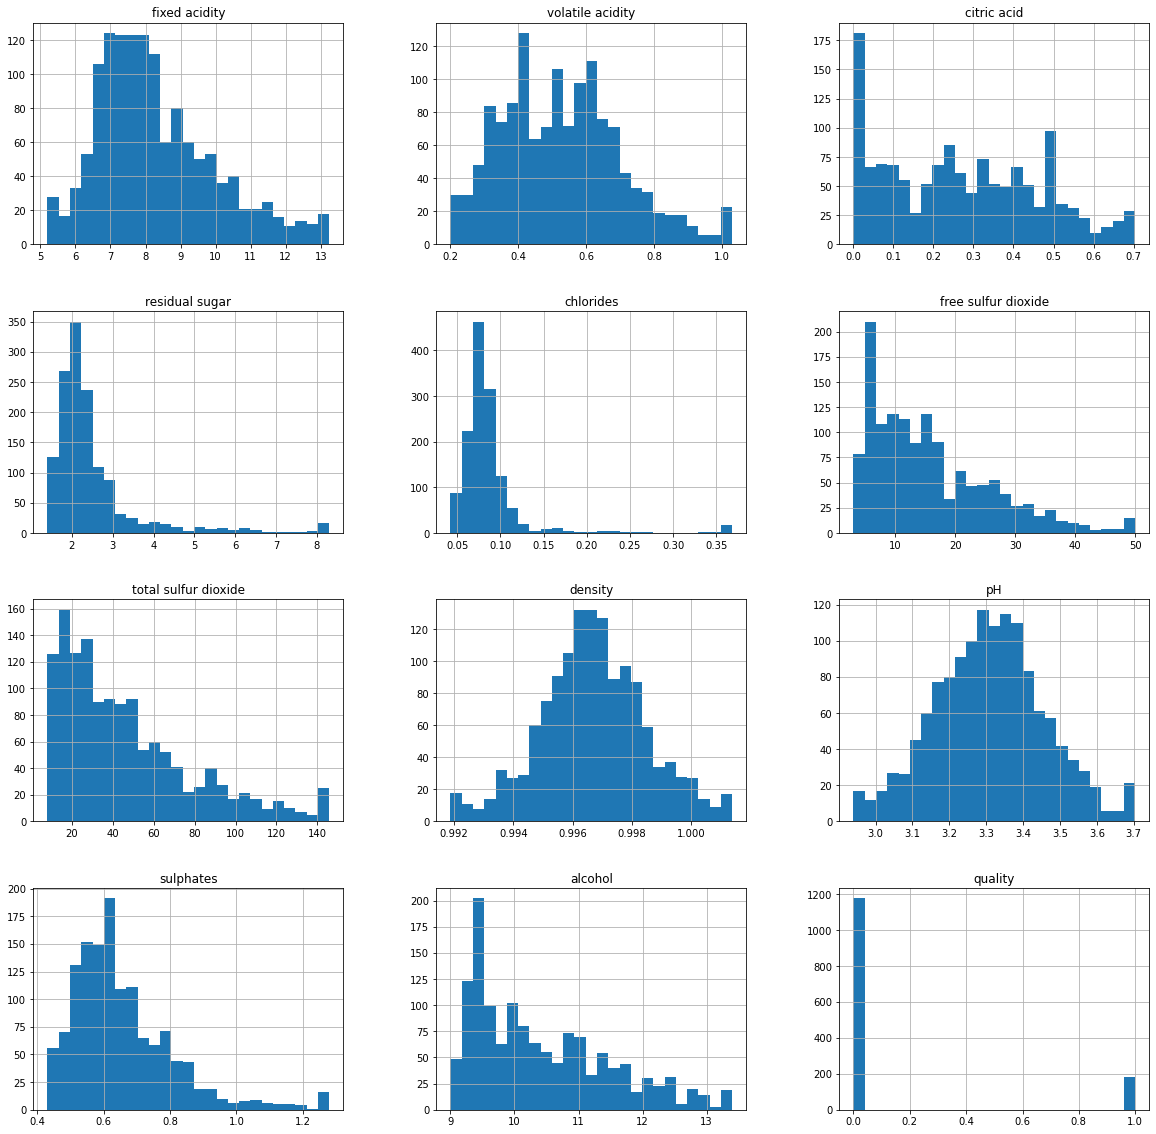

In [330]:
wq.hist(bins=25,figsize=(20,20))

plt.show()

In [331]:
wq.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

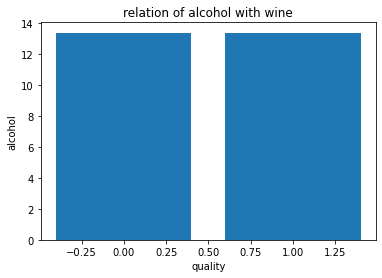

In [332]:
plt.bar(wq['quality'], wq['alcohol'])
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

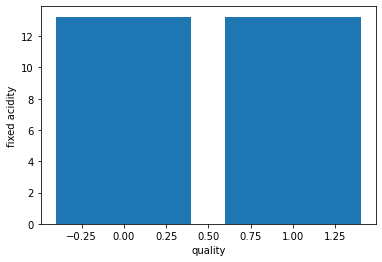

In [333]:
plt.bar(wq['quality'], wq["fixed acidity"])
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

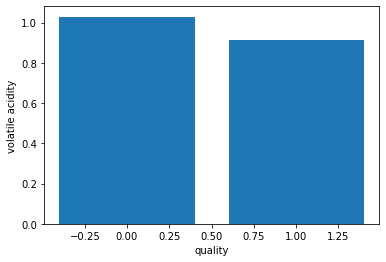

In [334]:
plt.bar(wq['quality'], wq["volatile acidity"])
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

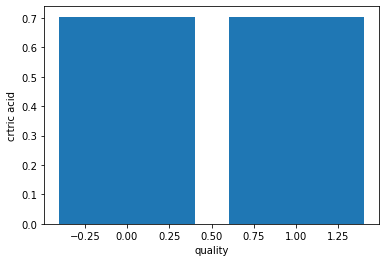

In [335]:
plt.bar(wq['quality'], wq["citric acid"])
plt.xlabel('quality')
plt.ylabel('crtric acid')
plt.show()

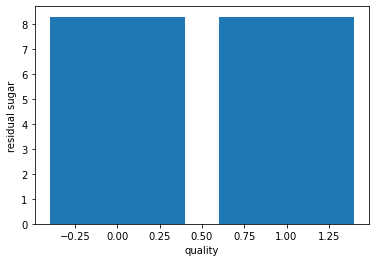

In [336]:
plt.bar(wq['quality'], wq["residual sugar"])
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()

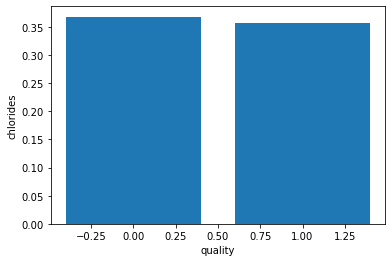

In [337]:
plt.bar(wq['quality'], wq["chlorides"])
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

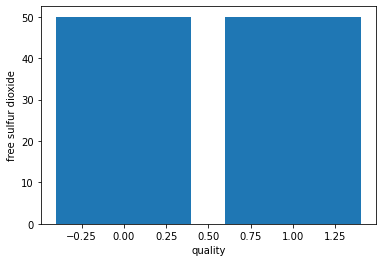

In [338]:
plt.bar(wq['quality'], wq["free sulfur dioxide"])
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.show()

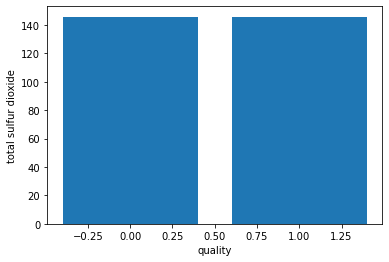

In [339]:
plt.bar(wq['quality'], wq["total sulfur dioxide"])
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

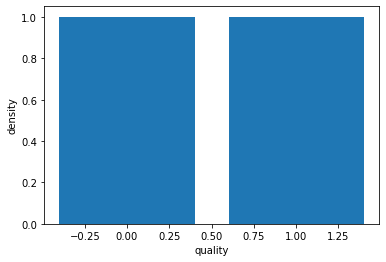

In [340]:
plt.bar(wq['quality'], wq["density"])
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

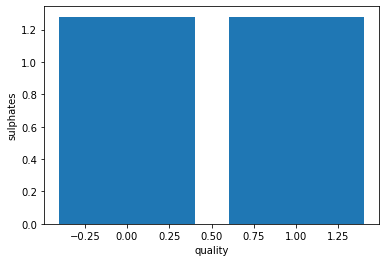

In [341]:
plt.bar(wq['quality'], wq["sulphates"])
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

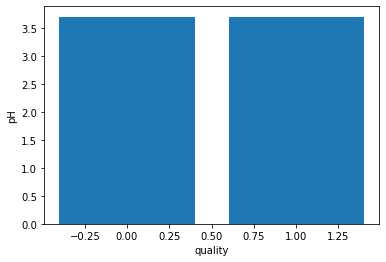

In [342]:
plt.bar(wq['quality'], wq["pH"])
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

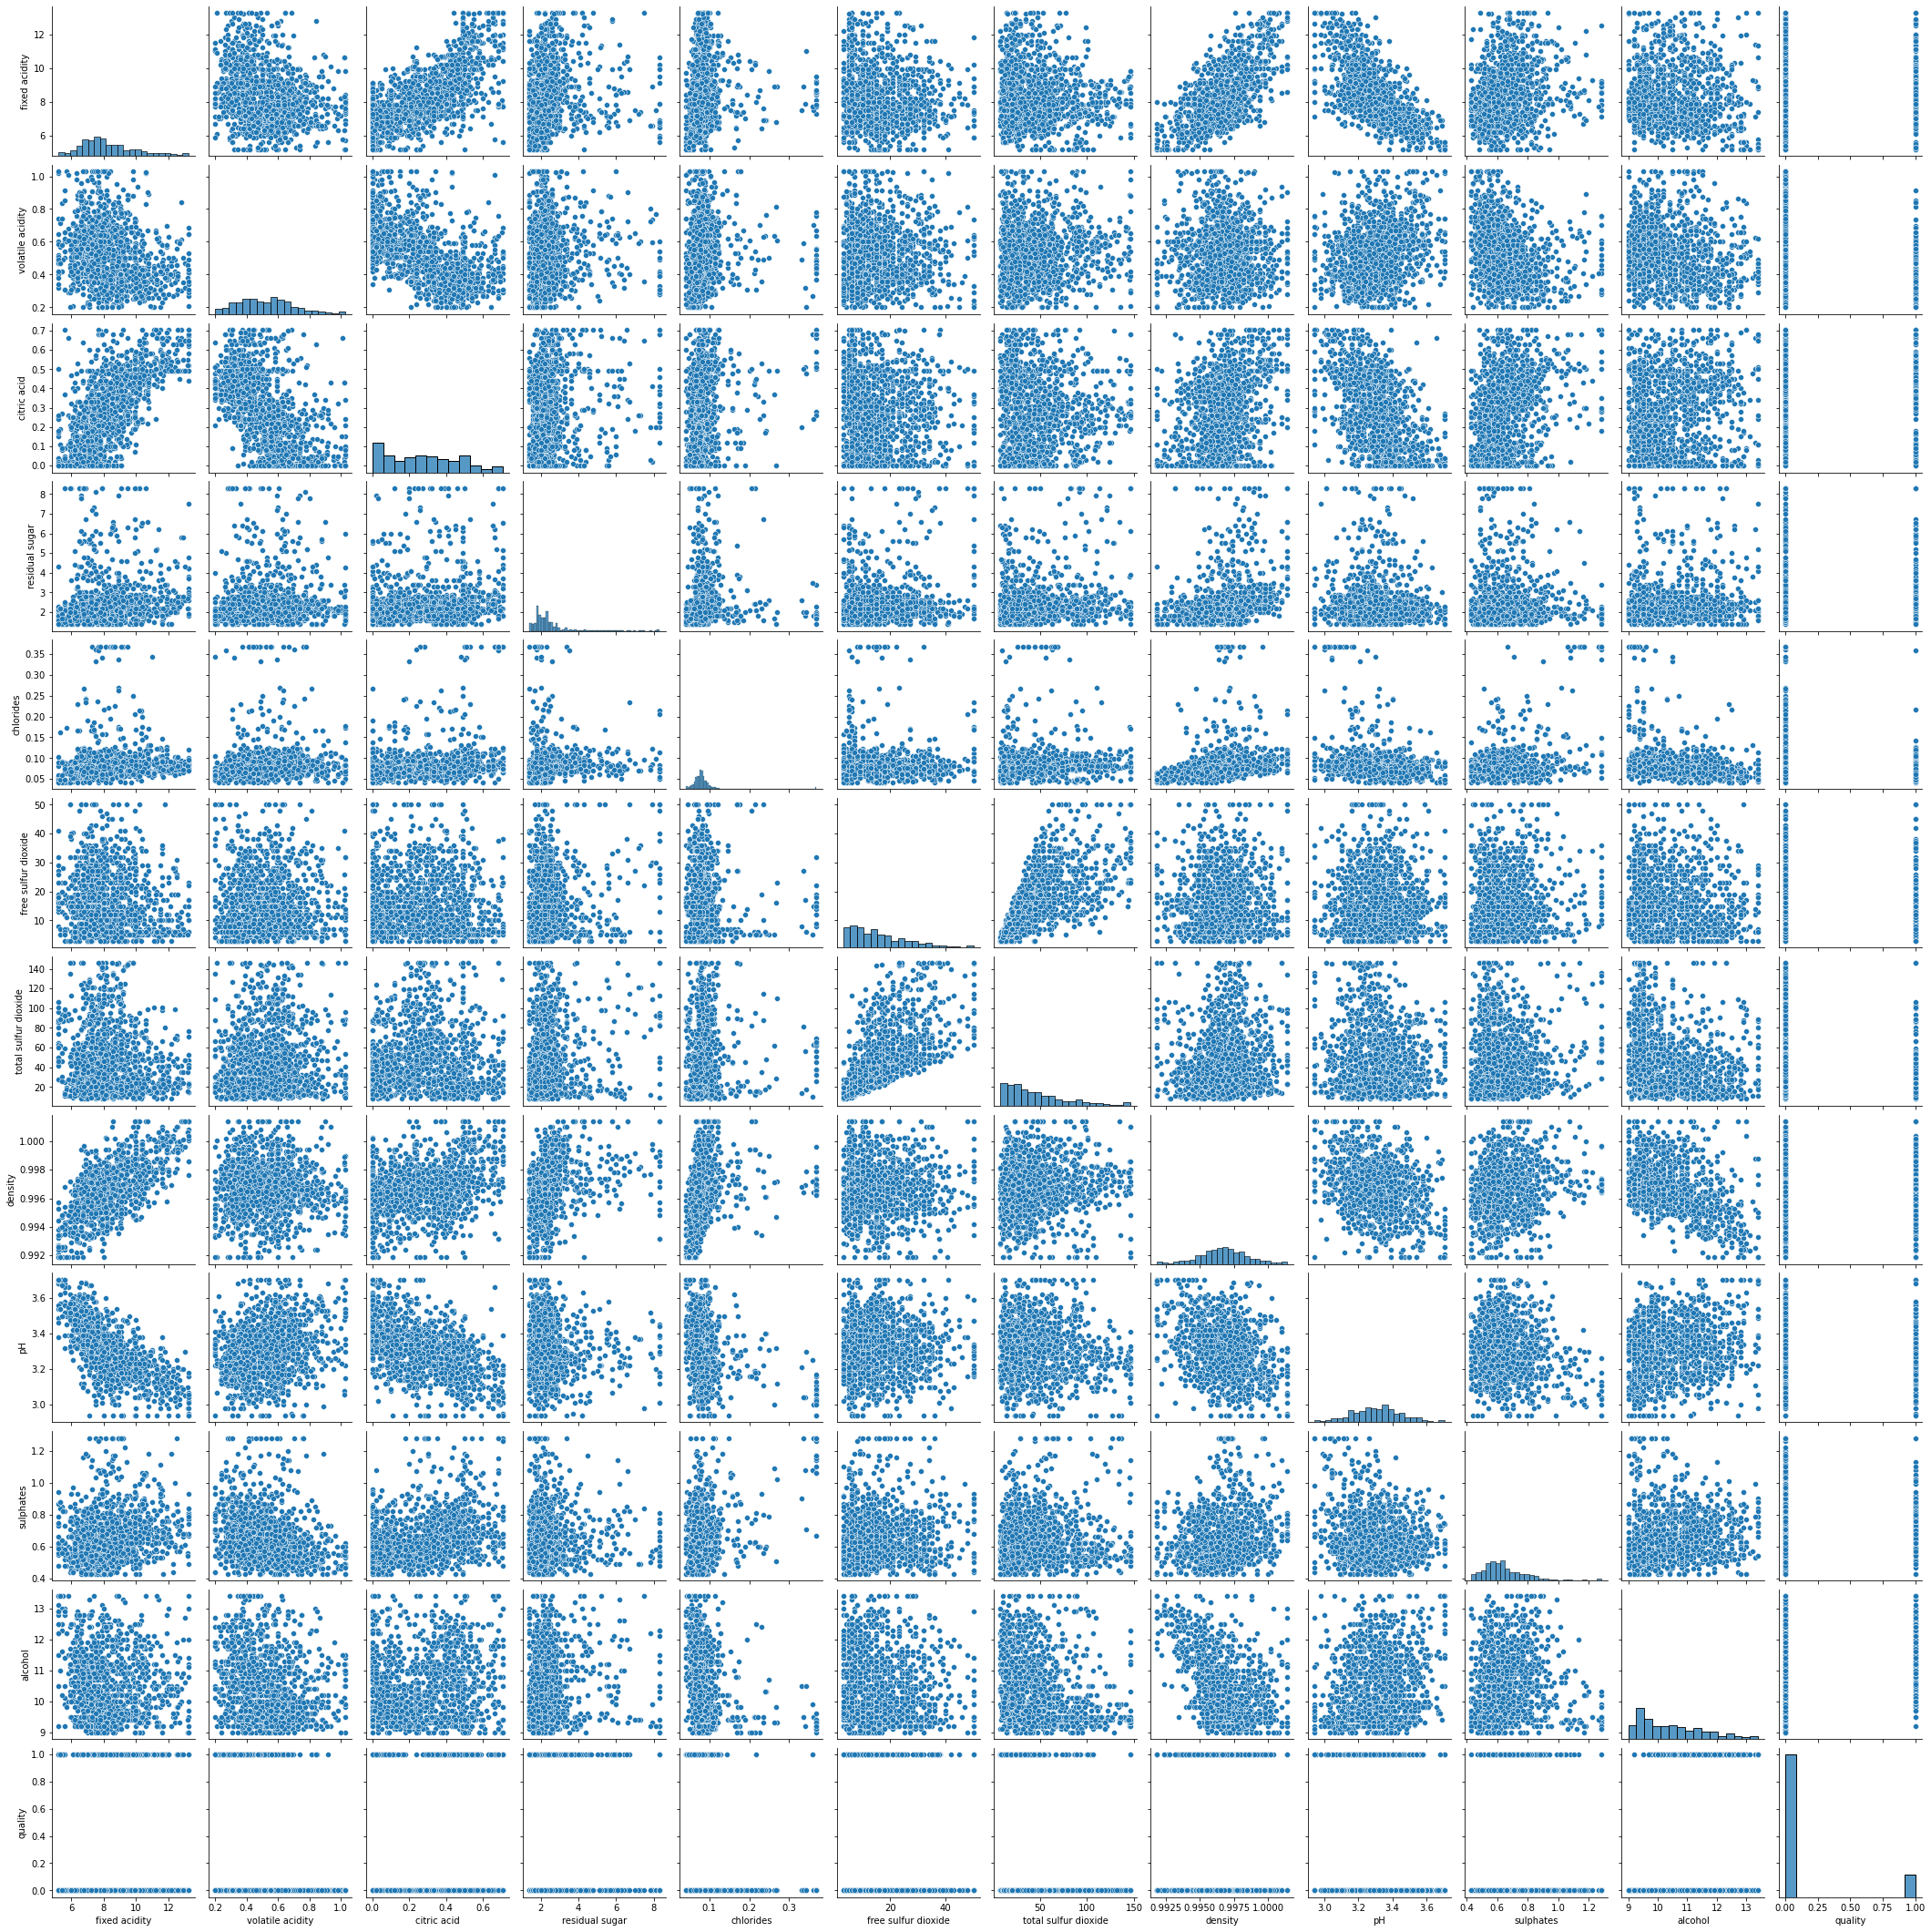

In [343]:
sns.pairplot(wq)
plt.show()

## PCA

In [344]:
from sklearn.preprocessing import StandardScaler

In [345]:
sc_x = StandardScaler()  
sc_x_fit=sc_x.fit(wq)
X_std = sc_x_fit.transform(wq)

In [346]:
wq_1=pd.DataFrame(X_std, columns=wq.columns)

In [347]:
wq_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.532,0.969,-1.402,-0.522,-0.262,-0.474,-0.391,0.603,1.337,-0.620,-0.967,-0.396
1,-0.296,1.985,-1.402,0.093,0.244,0.899,0.635,0.052,-0.728,0.153,-0.591,-0.396
2,-0.296,1.308,-1.195,-0.170,0.106,-0.082,0.231,0.162,-0.328,-0.041,-0.591,-0.396
3,1.710,-1.401,1.487,-0.522,-0.285,0.114,0.417,0.713,-0.994,-0.491,-0.591,-0.396
4,-0.532,0.744,-1.402,-0.609,-0.285,-0.278,-0.204,0.603,1.337,-0.620,-0.967,-0.396
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.886,0.518,-0.989,-0.522,-0.447,1.194,-0.266,-0.107,0.738,1.054,-0.873,-0.396
1355,-1.240,0.405,-0.989,-0.434,0.060,1.586,-0.080,-0.994,0.938,-0.491,0.066,-0.396
1356,-1.417,0.123,-0.886,-0.258,-0.585,2.273,0.138,-0.873,1.404,0.668,0.724,-0.396
1357,-1.417,0.659,-0.783,-0.434,-0.285,1.586,-0.080,-0.680,1.737,0.346,-0.216,-0.396


In [348]:
from sklearn.decomposition import PCA 
# create instance for pca
sklearn_pca = PCA()
# fit and transform the instance on datad
sklearn_pca_fit=sklearn_pca.fit(wq_1)
pca_result=sklearn_pca_fit.transform(wq_1)

In [349]:
pd.DataFrame(pca_result, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',"P12"])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,P12
0,-1.767,-0.968,-1.406,-0.099,0.223,-0.059,-1.094,0.240,-0.347,0.010,-0.242,0.027
1,-0.914,-1.943,0.025,0.324,0.610,-1.362,0.221,-0.675,0.752,-0.543,0.084,-0.142
2,-0.849,-1.217,-0.686,0.246,0.348,-0.790,-0.011,-0.282,0.589,-0.118,-0.184,-0.123
3,2.364,-0.232,-0.094,-0.645,-1.834,0.306,0.113,0.068,-0.438,0.119,-0.164,0.335
4,-1.729,-1.016,-1.151,-0.065,0.017,-0.014,-1.137,0.290,-0.382,-0.028,-0.348,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,-1.305,-0.832,0.372,0.911,-0.086,0.061,-1.363,-0.267,0.513,-0.759,0.663,-0.029
1355,-2.239,-0.504,0.877,0.525,-0.266,0.095,0.134,-0.012,-0.412,-0.955,0.406,-0.057
1356,-2.240,-0.127,2.012,0.611,-0.071,0.551,-0.726,-0.750,-0.133,-1.036,0.509,-0.236
1357,-2.357,-0.589,0.986,0.746,0.071,0.389,-0.908,-0.278,-0.408,-0.562,0.823,0.031


In [350]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.DataFrame(sklearn_pca_fit.explained_variance_)

,0
0,3.141
1,2.183
2,1.632
3,1.221
4,1.019
5,0.667
6,0.657
7,0.531
8,0.390
9,0.330


In [351]:
var=pd.concat([pd.DataFrame(sklearn_pca_fit.explained_variance_), pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_),pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_).cumsum(axis=0) ], axis=1)
var.columns=["eigen","Ratio", "Ratio_Cum"]
var.to_csv("C:/Users/HP/Downloads/winequalityexcel.csv")

In [352]:
pcs4=PCA(n_components=4)
pcs4_fit=pcs4.fit(wq_1)
X_pcs=pcs4_fit.transform(wq_1)

In [353]:
X = pd.DataFrame(X_pcs, columns=['PC1','PC2','PC3','PC4'])

In [354]:
y = wq['quality']

In [403]:
from sklearn.linear_model import LogisticRegression

In [404]:
log0=LogisticRegression()
log0.fit(X_train, y_train) 

LogisticRegression()

In [405]:
print("Train Accuracy :", log0.score(X_train, y_train))  

Train Accuracy : 0.9668813247470102


In [406]:
print("Test Accuracy :", log0.score(X_test, y_test))

Test Accuracy : 0.9117647058823529


## KNN

In [358]:
# y = quality
# x = pd.DataFrame(X_pcs, columns=['PC1','PC2','PC3','PC4'])

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [361]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [362]:
scale=MinMaxScaler()

In [363]:
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [364]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,PC1,PC2,PC3,PC4
0,0.313,0.339,0.132,0.642
1,0.810,0.787,0.365,0.080
2,0.343,0.522,0.260,0.367
3,0.307,0.499,0.153,0.323
4,0.428,0.313,0.321,0.238
...,...,...,...,...
946,0.548,0.527,0.131,0.200
947,0.378,0.549,0.114,0.319
948,0.497,0.452,0.049,0.317
949,0.195,0.488,0.105,0.338


In [365]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [366]:
X_train_scaled

,PC1,PC2,PC3,PC4
0,0.313,0.339,0.132,0.642
1,0.810,0.787,0.365,0.080
2,0.343,0.522,0.260,0.367
3,0.307,0.499,0.153,0.323
4,0.428,0.313,0.321,0.238
...,...,...,...,...
946,0.548,0.527,0.131,0.200
947,0.378,0.549,0.114,0.319
948,0.497,0.452,0.049,0.317
949,0.195,0.488,0.105,0.338


In [367]:
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [368]:
X_test_scaled

,PC1,PC2,PC3,PC4
0,0.575,0.825,0.517,0.309
1,0.773,0.623,0.363,0.367
2,0.356,0.490,0.218,0.343
3,0.489,0.292,0.390,0.270
4,0.461,0.085,0.460,0.242
...,...,...,...,...
403,0.714,0.771,0.382,0.329
404,0.366,0.474,0.418,0.375
405,0.379,0.364,0.053,0.232
406,0.316,0.469,0.535,0.437


In [369]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(X_train_scaled, y_train)
print("Train Score :", knn1.score(X_train_scaled, y_train))
print("Test Score :", knn1.score(X_test_scaled, y_test))

Train Score : 0.9652996845425867
Test Score : 0.946078431372549


In [370]:
knn1=KNeighborsClassifier(n_neighbors=19,  p=2)
knn1.fit(X_train_scaled, y_train)
print("Train Score :", knn1.score(X_train_scaled, y_train))
print("Test Score :", knn1.score(X_test_scaled, y_test)) 

Train Score : 0.9568874868559412
Test Score : 0.9485294117647058


In [371]:
knn1=KNeighborsClassifier(n_neighbors=21,  p=3)
knn1.fit(X_train_scaled, y_train)
print("Train Score :", knn1.score(X_train_scaled, y_train))
print("Test Score :", knn1.score(X_test_scaled, y_test))

Train Score : 0.9589905362776026
Test Score : 0.946078431372549


## SVM

In [372]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn import svm 

In [373]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=88)

In [374]:
sc=StandardScaler()
sc_fit=sc.fit(X_train)

In [375]:
X_train_sc=sc_fit.transform(X_train)
X_test_sc=sc_fit.transform(X_test)

In [376]:
X_train_sc_df=pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc_df=pd.DataFrame(X_test_sc, columns=X_test.columns)

In [377]:
sv1=svm.LinearSVC()

In [378]:
sv1.fit(X_train_sc_df, y_train)
print("Train score :", sv1.score(X_train_sc_df, y_train))
print("Test score :", sv1.score(X_test_sc_df, y_test))

Train score : 0.9549218031278749
Test score : 0.9558823529411765


In [379]:
sv2=svm.SVC(kernel="linear", C=10)
sv2.fit(X_train_sc_df, y_train)
print("Train score :", sv2.score(X_train_sc_df, y_train))
print("Test score :", sv2.score(X_test_sc_df, y_test))

Train score : 0.9595216191352346
Test score : 0.9595588235294118


In [380]:
sv3=svm.SVC(kernel="poly", degree=4)
sv3.fit(X_train_sc_df, y_train)
print("Train score :", sv3.score(X_train_sc_df, y_train))
print("Test score :", sv3.score(X_test_sc_df, y_test))

Train score : 0.9595216191352346
Test score : 0.9448529411764706


## Navie Bayes

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [382]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=99)


In [383]:
mn=MinMaxScaler()

mn_fit=mn.fit(X_train)

X_train_mn=mn_fit.transform(X_train)

X_test_mn=mn_fit.transform(X_test)

X_train_mn=pd.DataFrame(X_train_mn,columns=X_train.columns)

X_test_mn=pd.DataFrame(X_test_mn,columns=X_test.columns)

In [384]:
nbm=MultinomialNB()

In [385]:
nbm0=nbm.fit(X_train_mn, y_train)

In [386]:
mm=MultinomialNB()
mm.fit(X_train_mn,y_train)
print("Train Accuracy ",mm.score(X_train_mn,y_train))
print("Test Accuracy ",mm.score(X_test_mn,y_test))


Train Accuracy  0.8702851885924563
Test Accuracy  0.8419117647058824


In [387]:
pd.DataFrame(mm.predict(X_train_mn)) 

,0
0,0
1,0
2,0
3,0
4,0
...,...
1082,0
1083,0
1084,0
1085,0


In [388]:
pd.DataFrame(mm.predict_proba(X_train_mn))

,0,1
0,0.878,0.122
1,0.883,0.117
2,0.865,0.135
3,0.873,0.127
4,0.878,0.122
...,...,...
1082,0.873,0.127
1083,0.867,0.133
1084,0.869,0.131
1085,0.876,0.124


In [389]:
pred_train=mm.predict(X_train_mn)
pred_test=mm.predict(X_test_mn)

In [390]:
metrics.confusion_matrix(y_train, pred_train)

array([[946,   0],
       [141,   0]], dtype=int64)

In [391]:
print(metrics.classification_report(y_train, pred_train)) 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       946
           1       0.00      0.00      0.00       141

    accuracy                           0.87      1087
   macro avg       0.44      0.50      0.47      1087
weighted avg       0.76      0.87      0.81      1087



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
